<a href="https://colab.research.google.com/github/UAPH451551/PH451_551_Sp24_private/blob/main/Resources/Pytorch_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from torch import nn
import torch
from torch.utils.data import Dataset, DataLoader
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)
torch.manual_seed(42)

In [ ]:
m = 3000
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

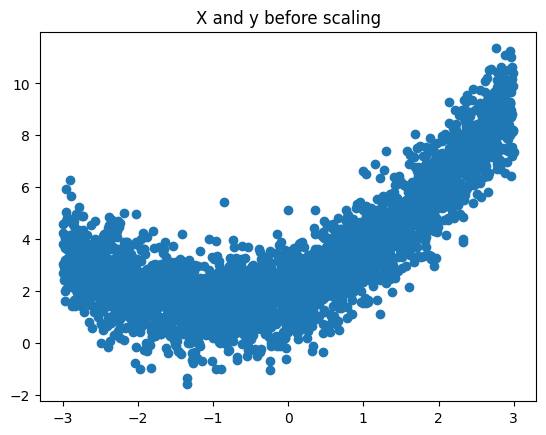

In [ ]:
plt.scatter(X, y)
plt.title('X and y before scaling')
plt.show()

In [ ]:
scaler = sklearn.preprocessing.StandardScaler()
xscaler = scaler.fit(X)
yscaler = scaler.fit(y)
X = scaler.transform(X)
y = scaler.transform(y)

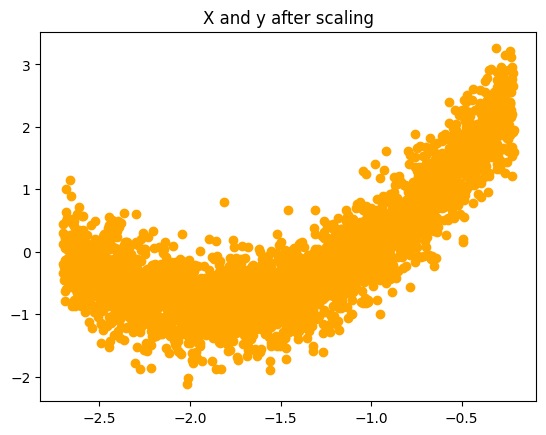

In [ ]:
plt.scatter(X, y, color='orange')
plt.title('X and y after scaling')
plt.show()

In [ ]:
X_train, X_test1, y_train, y_test1 = train_test_split(X, y, test_size=0.2, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test1, y_test1, test_size=0.5, random_state=42)

In [ ]:
class PytorchRegressionDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.from_numpy(X.copy()).float()
        self.y = torch.from_numpy(y.copy()).float()
    def __len__(self):
        return len(self.X)
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

In [ ]:
train_data = PytorchRegressionDataset(X_train, y_train)
val_data = PytorchRegressionDataset(X_val, y_val)
test_data = PytorchRegressionDataset(X_test, y_test)

train_loader = DataLoader(train_data, batch_size=5, shuffle=True)
test_loader = DataLoader(test_data, batch_size=5, shuffle=False)
val_loader = DataLoader(val_data, batch_size=5, shuffle=False)

## SGD Algorithm for Linear Regression:

$y_{pred}=\Theta_0 + \Theta_1x + ... + \Theta_nx^n$ <br>
$Loss = \Sigma_i|y_{true,i}-y_{pred,i}|^2$ <br>
$\Theta_{i,new} = \Theta_{i,old} - ( \partial Loss /\partial\Theta_i )* \eta$ $,\eta =$ learning rate

In [ ]:
class LinearRegressor(nn.Module):
    def __init__(self, degree):
        super().__init__()
        self.degree = degree
        self.module = torch.nn.ModuleList()
        for i in range(degree + 1):
            self.module.append(nn.Linear(1, 1, bias=False))
    def forward(self, x):
        pred = torch.zeros(x.shape[0], 1)
        for i in range(self.degree + 1):
            pred = pred + self.module[i](x**i)
        return pred

In [ ]:
model = LinearRegressor(degree=2)

In [ ]:
def train_and_validate(train_loader, val_loader, model, optimizer, criterion, metric, num_epochs):
    history = {
        'epoch': [],
        'train_loss': [],
        'train_metric': [],
        'val_loss': [],
        'val_metric': []
    }  # Initialize a dictionary to store epoch-wise results

    for epoch in range(num_epochs):
        model.train()  # Set the model to training mode
        epoch_loss = 0.0  # Initialize the epoch loss and metric values
        epoch_metric = 0.0

        # Training loop
        for X, y in train_loader:
            optimizer.zero_grad()  # Clear existing gradients
            outputs = model(X)  # Make predictions
            loss = criterion(outputs, y)  # Compute the loss
            loss.backward()  # Compute gradients
            optimizer.step()  # Update model parameters

            epoch_loss += loss.item()
            epoch_metric += metric(outputs, y)

        # Average training loss and metric
        epoch_loss /= len(train_loader)
        epoch_metric /= len(train_loader)

        # Validation loop
        model.eval()  # Set the model to evaluation mode
        with torch.no_grad():  # Disable gradient calculation
            val_loss = 0.0
            val_metric = 0.0
            for X_val, y_val in val_loader:
                outputs_val = model(X_val)  # Make predictions
                val_loss += criterion(outputs_val, y_val).item()  # Compute loss
                val_metric += metric(outputs_val, y_val)

            val_loss /= len(val_loader)
            val_metric /= len(val_loader)

        # Append epoch results to history
        history['epoch'].append(epoch_loss)
        history['train_loss'].append(epoch_loss)
        history['train_metric'].append(epoch_metric)
        history['val_loss'].append(val_loss)
        history['val_metric'].append(val_metric)

        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {epoch_loss:.4f}, '
              f'Train Metric: {epoch_metric:.4f}, Val Loss: {val_loss:.4f}, '
              f'Val Metric: {val_metric:.4f}')

    return history, model

In [ ]:
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
metric = torch.nn.L1Loss()

In [ ]:
history, model = train_and_validate(train_loader, val_loader, model,
                                    optimizer=optimizer, criterion=criterion,
                                    metric=metric, num_epochs=50)

Epoch [1/50], Train Loss: 0.8135, Train Metric: 0.6964, Val Loss: 0.5166, Val Metric: 0.5698
Epoch [2/50], Train Loss: 0.5456, Train Metric: 0.5957, Val Loss: 0.5072, Val Metric: 0.5653
Epoch [3/50], Train Loss: 0.5373, Train Metric: 0.5920, Val Loss: 0.4931, Val Metric: 0.5604
Epoch [4/50], Train Loss: 0.5280, Train Metric: 0.5874, Val Loss: 0.4830, Val Metric: 0.5546
Epoch [5/50], Train Loss: 0.5182, Train Metric: 0.5823, Val Loss: 0.4724, Val Metric: 0.5485
Epoch [6/50], Train Loss: 0.5082, Train Metric: 0.5763, Val Loss: 0.4618, Val Metric: 0.5425
Epoch [7/50], Train Loss: 0.4984, Train Metric: 0.5704, Val Loss: 0.4517, Val Metric: 0.5358
Epoch [8/50], Train Loss: 0.4885, Train Metric: 0.5647, Val Loss: 0.4441, Val Metric: 0.5289
Epoch [9/50], Train Loss: 0.4786, Train Metric: 0.5583, Val Loss: 0.4314, Val Metric: 0.5228
Epoch [10/50], Train Loss: 0.4689, Train Metric: 0.5525, Val Loss: 0.4272, Val Metric: 0.5169
Epoch [11/50], Train Loss: 0.4591, Train Metric: 0.5459, Val Loss: 0.

In [ ]:
predictions = model(test_loader.dataset.X)

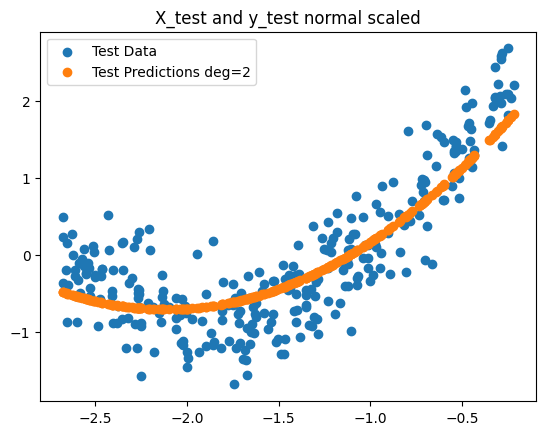

In [ ]:
plt.scatter(X_test, y_test, label='Test Data')
plt.scatter(X_test, predictions.detach().numpy(), label='Test Predictions deg=2')
plt.legend()
plt.title('X_test and y_test normal scaled')
plt.show()

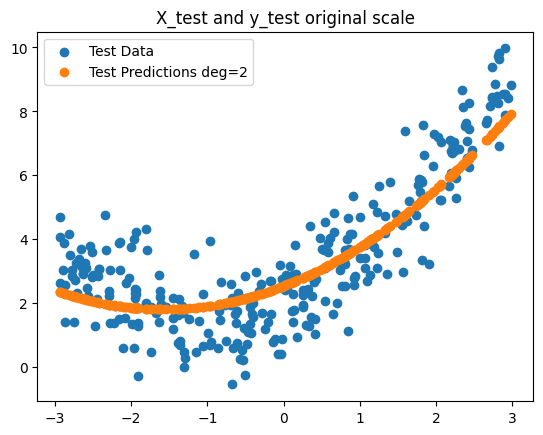

In [ ]:
plt.scatter(xscaler.inverse_transform(X_test), yscaler.inverse_transform(y_test), label='Test Data')
plt.scatter(xscaler.inverse_transform(X_test), yscaler.inverse_transform(predictions.detach().numpy()), label='Test Predictions deg=2')
plt.legend()
plt.title('X_test and y_test original scale')
plt.show()

In [ ]:
model = LinearRegressor(degree=8)

In [ ]:
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
metric = torch.nn.L1Loss()

In [ ]:
history, model = train_and_validate(train_loader, val_loader, model,
                                    optimizer=optimizer, criterion=criterion,
                                    metric=metric, num_epochs=50)

Epoch [1/50], Train Loss: 1356.4035, Train Metric: 13.0177, Val Loss: 139.5804, Val Metric: 7.6258
Epoch [2/50], Train Loss: 126.6450, Train Metric: 7.0321, Val Loss: 119.8597, Val Metric: 7.1540
Epoch [3/50], Train Loss: 107.3717, Train Metric: 6.5574, Val Loss: 95.7901, Val Metric: 6.3247
Epoch [4/50], Train Loss: 86.3863, Train Metric: 6.0184, Val Loss: 75.2109, Val Metric: 5.6273
Epoch [5/50], Train Loss: 67.4960, Train Metric: 5.4446, Val Loss: 57.4347, Val Metric: 5.1892
Epoch [6/50], Train Loss: 53.9254, Train Metric: 5.0677, Val Loss: 44.4043, Val Metric: 4.7411
Epoch [7/50], Train Loss: 43.0494, Train Metric: 4.7626, Val Loss: 35.6782, Val Metric: 4.3986
Epoch [8/50], Train Loss: 36.5271, Train Metric: 4.5578, Val Loss: 30.2491, Val Metric: 4.2499
Epoch [9/50], Train Loss: 31.8158, Train Metric: 4.3700, Val Loss: 29.4167, Val Metric: 4.2598
Epoch [10/50], Train Loss: 28.4757, Train Metric: 4.2305, Val Loss: 23.8481, Val Metric: 3.8523
Epoch [11/50], Train Loss: 25.8090, Train 

In [ ]:
predictions = model(test_loader.dataset.X)

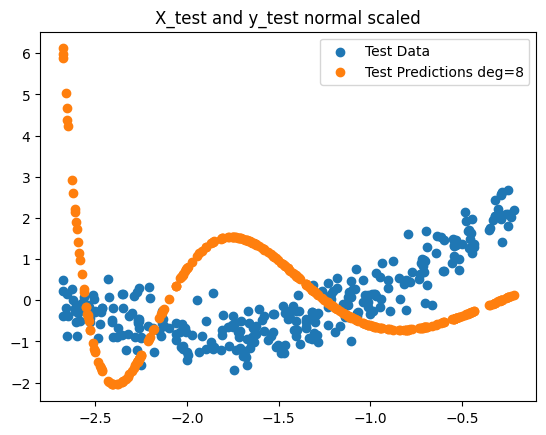

In [ ]:
plt.scatter(X_test, y_test, label='Test Data')
plt.scatter(X_test, predictions.detach().numpy(), label='Test Predictions deg=8')
plt.legend()
plt.title('X_test and y_test normal scaled')
plt.show()

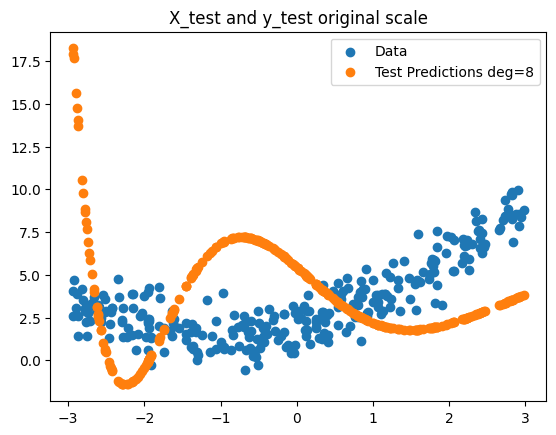

In [ ]:
plt.scatter(xscaler.inverse_transform(X_test), yscaler.inverse_transform(y_test), label='Data')
plt.scatter(xscaler.inverse_transform(X_test), yscaler.inverse_transform(predictions.detach().numpy()), label='Test Predictions deg=8')
plt.legend()
plt.title('X_test and y_test original scale')
plt.show()

## Let's now compare SGD for linear regression to SGD for Neural Nets:

### SGD Algorithm for Linear Regression:

$y_{pred}=\Theta_0 + \Theta_1x_1 + ... + \Theta_nx_n$ <br>
$Loss = \Sigma_i|y_{true,i}-y_{pred,i}|^2$ <br>
$\Theta_{i,new} = \Theta_{i,old} - ( \partial Loss /\partial\Theta_i )* \eta$ $,\eta =$ learning rate

## SGD Optimizer for Linear Models with Mean Square Error Loss Function:

Consider just the neuron activation for the first neuron in the last layer. <br>
This neuron is essentially what our model prediction is for the first output $y_0$.

$a_{0,l} = \sigma[w_{0,l}(a_{0,l-1} + a_{1,l-1} + ... a_{m,l-1})+ b_l]$ <br>
a are activations of neurons, b are layer biases, w are neuron weights, $\sigma$ <br>
is some sort of activation function <br>

Consider now how we can evaluate this loss using MSE: <br>
$Loss_{0,l} = |y_{true,0}-a_{0,l}|^2$ <br>

We can update our weights just like we updated our $\Theta$ values in linear reg. <br>
$w_{0,l,new} = w_{0,l,old} - ( \partial Loss /\partial w_{0,l} )* \eta$ $,\eta =$ learning rate <br>

Same for biases. <br>
$b_{l,new} = b_{l,old} - ( \partial Loss /\partial b_l )* \eta$

We then repeat this procedure going from the end of the model backward to the <br>
start of the model updating all of the neuron weights and layer biases. Note <br>
that the neurons in the second-to-last layer would need to have their losses <br>
partial derivatives summed over all activations in the final layer since <br> they're connected to all of the final layer neurons.

It turns out that this process is totally general and can be used for many loss <br>
functions and activation functions. Most other optimizer algorithms are just <br>
improvements aimed at smoothing the behavior of SGD.

In [ ]:
# Sequential classifier for 10 1D inputs 30 hidden dimensions and 1 binary class
sequential_model1 = nn.Sequential()
sequential_model1.append(nn.Linear(10, 30))
sequential_model1.append(nn.ReLU())
sequential_model1.append(nn.Linear(30, 1))
sequential_model1.append(nn.Sigmoid())

optim = torch.optim.SGD(sequential_model1.parameters(), lr=0.001)
criterion = nn.BCELoss()

In [ ]:
# Sequential classifier for 10x10 2D inputs 50 hidden dimensions and 1 binary class
sequential_model2 = nn.Sequential()
sequential_model2.append(nn.Flatten())
sequential_model2.append(nn.Linear(10*10, 50))
sequential_model2.append(nn.ReLU())
sequential_model2.append(nn.Linear(50, 1))
sequential_model2.append(nn.Sigmoid())

optim = torch.optim.SGD(sequential_model2.parameters(), lr=0.001)
criterion = nn.BCELoss()

In [ ]:
# Sequential classifier for 20x30 1D inputs 30 hidden dimensions and 10 unique classes
sequential_model3 = nn.Sequential()
sequential_model3.append(nn.Flatten())
sequential_model3.append(nn.Linear(20*30, 30))
sequential_model3.append(nn.ReLU())
sequential_model3.append(nn.Linear(30, 10))
sequential_model3.append(nn.Softmax())

optim = torch.optim.SGD(sequential_model3.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

In [ ]:
# Sequential regressor for 20 1D inputs 50 hidden dimensions and 3 outputs
sequential_model4 = nn.Sequential()
sequential_model4.append(nn.Linear(20, 50))
sequential_model4.append(nn.ReLU())
sequential_model4.append(nn.Linear(50, 3))

optim = torch.optim.SGD(sequential_model4.parameters(), lr=0.001)
criterion = nn.MSELoss()